<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/portfolio/momentum_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [51]:
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty_stocks = tickers
start_date='2015-01-01'
end_date='2019-12-26'

In [52]:
dataset = yf.download(nifty_stocks, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  50 of 50 completed


In [53]:
'''
# Define the list of Nifty 50 constituents
nifty_50_constituents = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS']  # Add more constituents as needed

# Download historical data for each constituent
data = {}
for ticker in nifty_50_constituents:
    data[ticker] = yf.download(ticker, start='1927-01-01', end='2014-12-31')
'''
# Combine the adjusted close prices into a single DataFrame

adj_close_data = {}
for ticker, df in dataset.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[ticker] = df['Adj Close']
    elif isinstance(df, pd.Series):
        adj_close_data[ticker] = df  # Assuming the Series itself represents the 'Adj Close' prices

adj_close = pd.DataFrame(adj_close_data)


# Calculate monthly returns
returns = adj_close.pct_change()

# Step 2: Calculate the monthly momentum variable
momentum_variable = returns.rolling(window=252).sum()

# Step 3: Select the top 25 stocks based on momentum variable
top_50_stocks = momentum_variable.sum().nlargest(25).index
top_50_stocks_data = returns[top_50_stocks]

#
# Step 4: Implement PCA on the selected stocks after handling missing values
cleaned_data = top_50_stocks_data.dropna()  # Drop rows with missing values


In [54]:
cleaned_data

,BAJFINANCE.NS,BAJAJFINSV.NS,ADANIENT.NS,TITAN.NS,JSWSTEEL.NS,RELIANCE.NS,LTIM.NS,BRITANNIA.NS,HINDALCO.NS,HINDUNILVR.NS,...,DIVISLAB.NS,NESTLEIND.NS,BPCL.NS,ASIANPAINT.NS,MARUTI.NS,TCS.NS,INDUSINDBK.NS,ICICIBANK.NS,INFY.NS,GRASIM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-22,0.014923,-0.003393,0.006165,0.001222,0.000465,0.008446,0.003440,0.012843,0.015684,-0.007527,...,0.014143,0.030673,0.012061,0.004172,0.000227,0.003611,0.001936,0.005918,-0.006899,-0.002081
2016-07-25,0.016503,0.000039,-0.009191,0.007444,0.009578,0.007784,-0.009928,-0.000175,-0.005882,0.004152,...,-0.000415,0.006802,0.017661,0.022539,0.030772,0.020071,0.015367,0.019738,0.007833,-0.006134
2016-07-26,0.096253,0.044270,0.025355,0.003028,0.018975,0.001271,-0.001299,-0.009332,-0.026257,-0.004686,...,-0.014699,0.005283,-0.008677,-0.009247,-0.017416,-0.002482,0.000086,-0.026056,0.007263,-0.000936
2016-07-27,-0.005575,-0.037163,-0.000603,-0.005555,0.048182,-0.010693,-0.003251,-0.003896,0.016331,0.001274,...,0.002824,-0.012256,0.000255,0.000990,0.019424,0.009775,0.018894,0.034206,-0.003077,0.002811
2016-07-28,0.053439,0.019471,-0.006638,0.036191,-0.031593,0.013079,-0.014495,0.018665,0.003363,0.006141,...,0.004791,0.022745,-0.007986,0.062347,0.045051,0.016178,-0.008487,0.005174,-0.007233,-0.006663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,-0.003965,0.000091,-0.014441,0.001512,0.021046,0.008415,0.000061,0.008871,-0.000234,-0.016723,...,-0.004091,0.002965,-0.013708,0.018935,0.006324,0.001293,0.005393,0.000462,0.003769,-0.018991
2019-12-19,-0.006676,-0.009810,0.011530,-0.000043,0.001702,0.021639,0.014887,0.004372,0.012404,0.011693,...,-0.004815,0.006645,0.001431,0.013860,0.000000,0.028278,-0.007263,-0.002216,-0.002184,-0.014916
2019-12-20,0.010692,0.001003,0.039183,0.036970,-0.000566,-0.006739,0.023661,0.003052,-0.003699,-0.004100,...,-0.006014,0.040100,-0.004388,-0.002135,0.002880,-0.002759,-0.001309,0.010922,0.000958,0.003567


In [55]:
#cleaned_data = cleaned_data.clip(lower=cleaned_data.quantile(0.01), upper=cleaned_data.quantile(0.99), axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=1)  # Considering only one component for simplicity
pca.fit(scaled_data)

# Step 5: Select the top 10 stocks based on PCA scores
pca_scores = pca.components_[0]
top_10_index = np.argsort(pca_scores)[-5:]
top_10_stocks = cleaned_data.iloc[:, top_10_index]

# Now, top_10_stocks contains the top 10 stocks for investment based on PCA scores
print(top_10_stocks)


            JSWSTEEL.NS  BAJFINANCE.NS  TATASTEEL.NS  BAJAJFINSV.NS  MARUTI.NS
Date                                                                          
2016-07-22     0.000465       0.014923      0.008694      -0.003393   0.000227
2016-07-25     0.009578       0.016503     -0.004925       0.000039   0.030772
2016-07-26     0.018975       0.096253      0.011412       0.044270  -0.017416
2016-07-27     0.048182      -0.005575     -0.012914      -0.037163   0.019424
2016-07-28    -0.031593       0.053439     -0.014646       0.019471   0.045051
...                 ...            ...           ...            ...        ...
2019-12-18     0.021046      -0.003965      0.012176       0.000091   0.006324
2019-12-19     0.001702      -0.006676      0.004497      -0.009810   0.000000
2019-12-20    -0.000566       0.010692      0.031897       0.001003   0.002880
2019-12-23    -0.003778       0.005900      0.002495       0.002586   0.013689
2019-12-24     0.011566      -0.004928      0.001839

In [56]:
pca_scores.shape

(25,)

[*********************100%%**********************]  5 of 5 completed


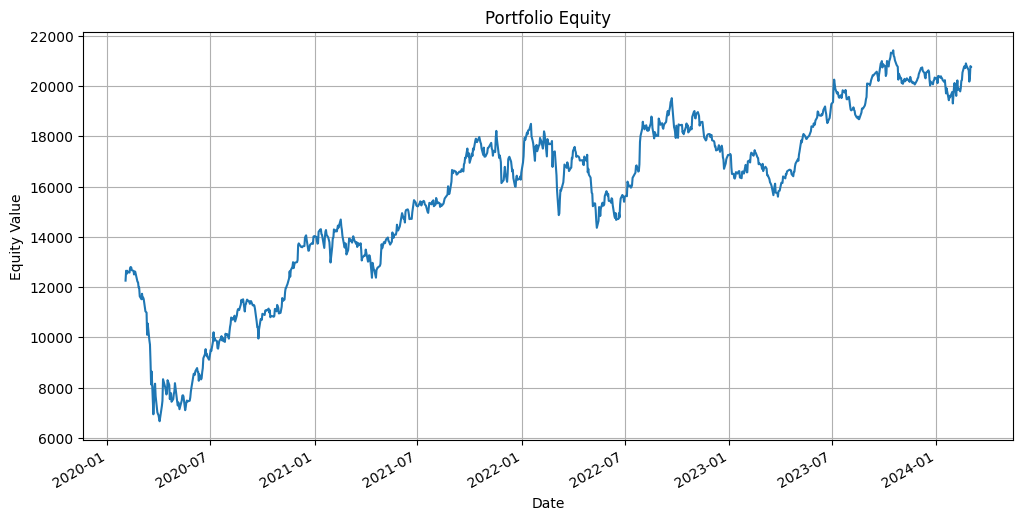

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = ['JSWSTEEL.NS','BAJFINANCE.NS','TATASTEEL.NS','BAJAJFINSV.NS','MARUTI.NS']
weights = [1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2020-02-01", end=today)["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()